   STORE_KEY  STORE_NUMBER   ROW_EFFECTIVE_TIMESTAMP  \
0         14          1704  2024-01-30T02:06:54.251Z   
1        824             1  2024-01-30T02:06:54.251Z   
2        862            39  2024-01-30T02:06:54.251Z   
3        880            57  2024-01-30T02:06:54.251Z   
4         21          1712  2024-01-30T02:06:54.251Z   

   ROW_EXPIRATION_TIMESTAMP STORE_NAME STORE_TYPE_CODE STORE_TYPE_NAME  \
0  2024-01-30T02:06:54.251Z     IL1704            Fran       Franchise   
1  2024-01-30T02:06:54.251Z        TX1            Fran       Franchise   
2  2024-01-30T02:06:54.251Z       IL39            Fran       Franchise   
3  2024-01-30T02:06:54.251Z       IL57            Fran       Franchise   
4  2024-01-30T02:06:54.251Z     OH1712            Fran       Franchise   

    OPEN_DATE  CLOSE_DATE         CITY_NAME  ... GLOBAL_REGION_NAME  \
0   6/20/2020  12/31/1999           CHICAGO  ...           Domestic   
1   4/14/1998  12/31/1999  HIGHLAND VILLAGE  ...           Domestic   
2  11

C:\Users\aryan\AppData\Local\Temp\ipykernel_19040\1356771730.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_openings = data.resample('M').sum()['STORE_COUNT']


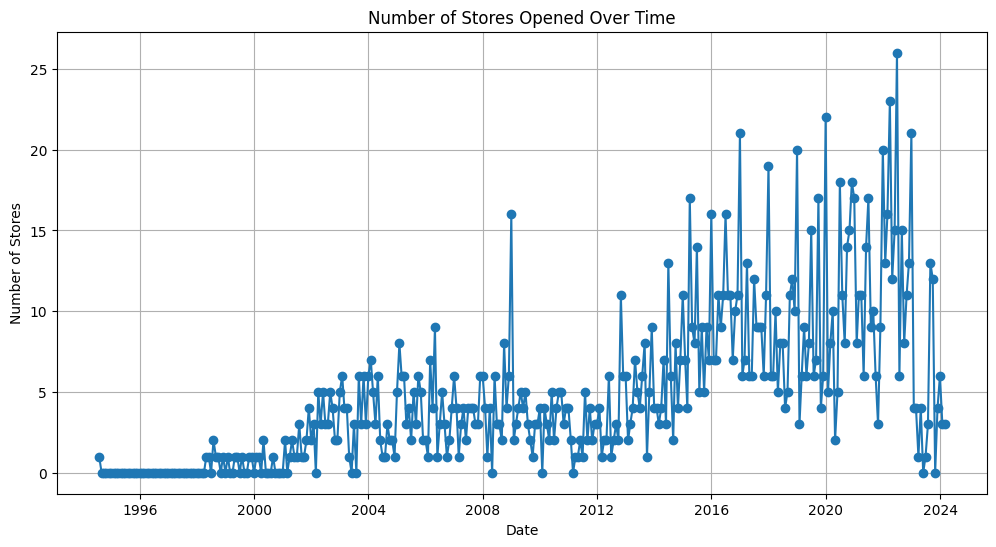

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\aryan\OneDrive\Desktop\dataRa\store_new.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Get a summary of the data
print(data.info())

# Print the column names
print(data.columns)

# Convert the date column to datetime
data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'])

# Set the date as the index
data.set_index('OPEN_DATE', inplace=True)

# If you have sales data from another file, you would load and merge it here. Assuming it is loaded into `sales_data`
# Example: sales_data = pd.read_csv('path_to_sales_data.csv')
# Then merge: data = pd.merge(data, sales_data, on='STORE_KEY')

# Plot the time series, assuming a column named 'NET_SALES_FINAL_USD_AMOUNT' exists in the sales data
# plt.figure(figsize=(12, 6))
# plt.plot(data['NET_SALES_FINAL_USD_AMOUNT'], marker='o', linestyle='-')
# plt.title('Sales Over Time')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.grid(True)
# plt.show()

# Since there is no direct sales data, let's plot the number of stores opened over time as an example
data['STORE_COUNT'] = 1
store_openings = data.resample('M').sum()['STORE_COUNT']

plt.figure(figsize=(12, 6))
plt.plot(store_openings, marker='o', linestyle='-')
plt.title('Number of Stores Opened Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stores')
plt.grid(True)
plt.show()


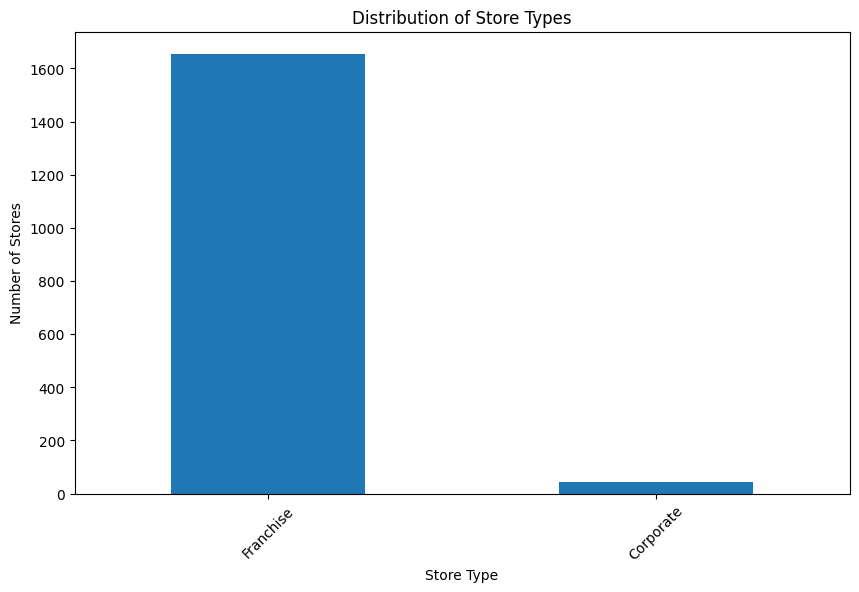

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = r'C:\Users\aryan\OneDrive\Desktop\dataRa\store_new.csv'
data = pd.read_csv(file_path)
# Count the number of each store type
store_type_counts = data['STORE_TYPE_NAME'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
store_type_counts.plot(kind='bar')
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()


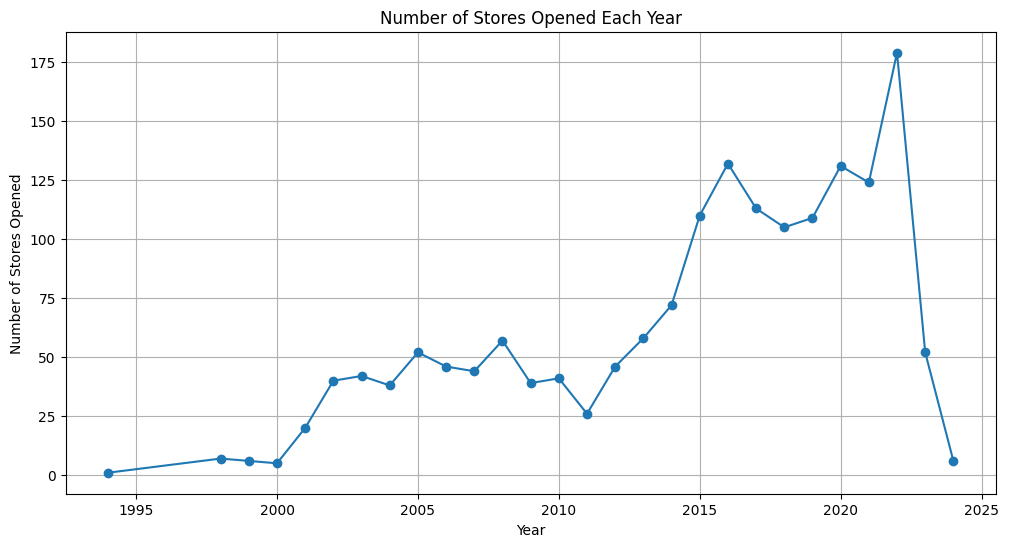

In [5]:
# Convert OPEN_DATE to datetime
data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'], errors='coerce')

# Extract year from OPEN_DATE
data['OPEN_YEAR'] = data['OPEN_DATE'].dt.year

# Count the number of stores opened each year
open_year_counts = data['OPEN_YEAR'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
open_year_counts.plot(kind='line', marker='o')
plt.title('Number of Stores Opened Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Stores Opened')
plt.grid(True)
plt.show()


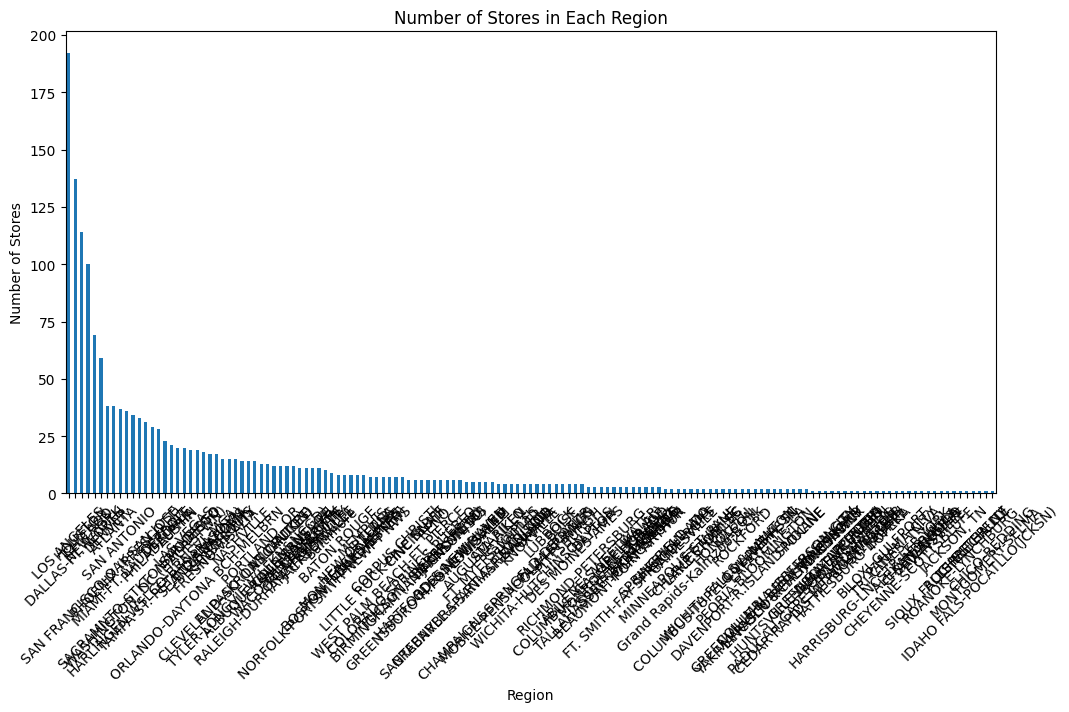

In [6]:
# Count the number of stores in each region
region_counts = data['AREA_REGION'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Number of Stores in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()


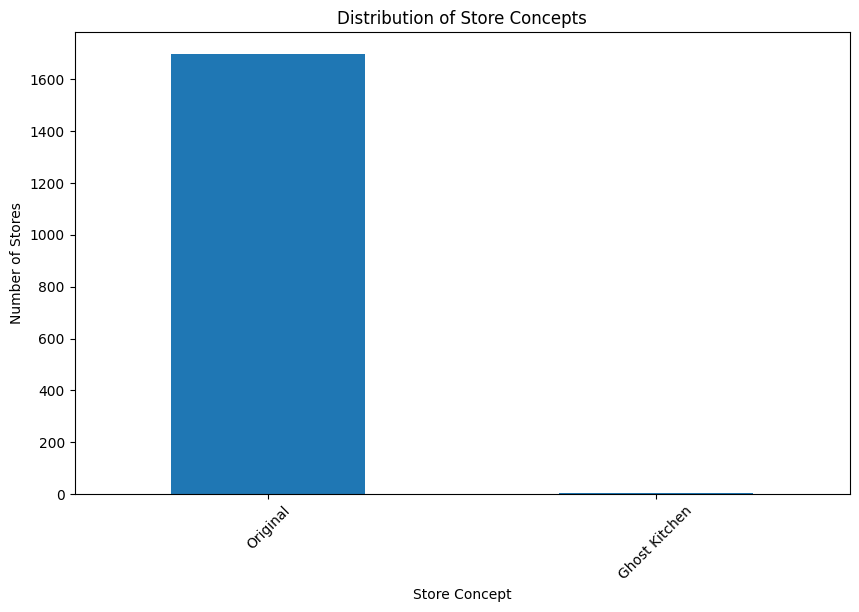

In [7]:
# Count the number of each store concept
store_concept_counts = data['STORE_CONCEPT_NAME'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
store_concept_counts.plot(kind='bar')
plt.title('Distribution of Store Concepts')
plt.xlabel('Store Concept')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()


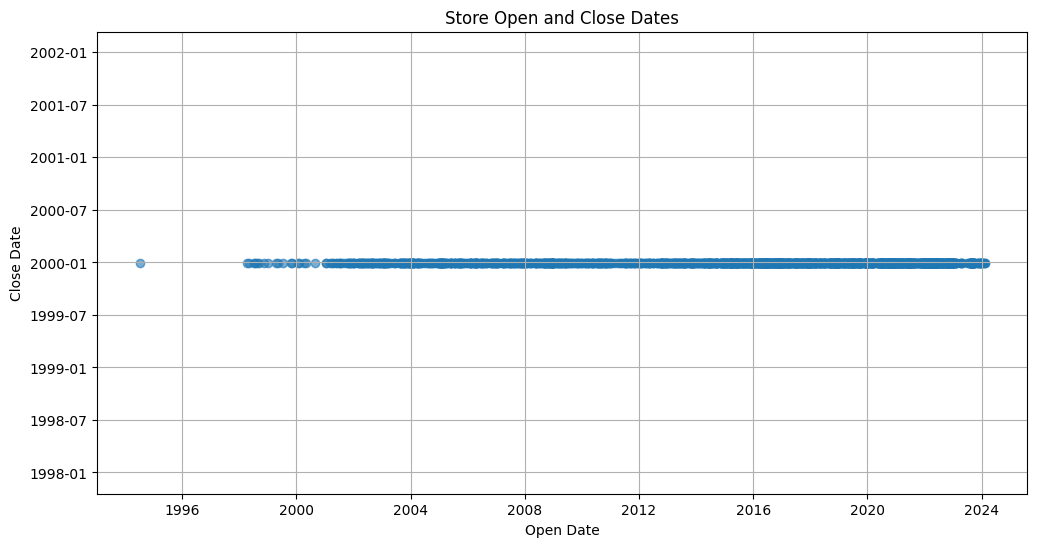

In [8]:
# Convert CLOSE_DATE to datetime
data['CLOSE_DATE'] = pd.to_datetime(data['CLOSE_DATE'], errors='coerce')

# Create a scatter plot for open and close dates
plt.figure(figsize=(12, 6))
plt.scatter(data['OPEN_DATE'], data['CLOSE_DATE'], alpha=0.6)
plt.title('Store Open and Close Dates')
plt.xlabel('Open Date')
plt.ylabel('Close Date')
plt.grid(True)
plt.show()
